# Survival analysis
## Using R Programing language in Google colab a Cloud plotform.

In [4]:
install.packages("tidyverse")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
my_data <- read.csv("/content/survival_analysis_dataset.csv")

In [6]:
head(my_data)

,Age,Race,Marital.Status,Tstage,Nstage,X6th.Stage,differentiate,Grade,A.Stage,Tumor.Size,Estrogen.Status,Progesterone.Status,Regional.Node.Examined,Reginol.Node.Positive,Survival.Months,Status
,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<int>,<chr>
1,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
2,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
3,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
4,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
5,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
6,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive


In [7]:
# Check for missing values
colSums(is.na(my_data))

Age                   Race         Marital.Status 
                     0                      0                      0 
                Tstage                 Nstage             X6th.Stage 
                     0                      0                      0 
         differentiate                  Grade                A.Stage 
                     0                      0                      0 
            Tumor.Size        Estrogen.Status    Progesterone.Status 
                     0                      0                      0 
Regional.Node.Examined  Reginol.Node.Positive        Survival.Months 
                     0                      0                      0 
                Status 
                     0

In [8]:
summary(my_data)

      Age            Race           Marital.Status        Tstage         
 Min.   :30.00   Length:4024        Length:4024        Length:4024       
 1st Qu.:47.00   Class :character   Class :character   Class :character  
 Median :54.00   Mode  :character   Mode  :character   Mode  :character  
 Mean   :53.97                                                           
 3rd Qu.:61.00                                                           
 Max.   :69.00                                                           
    Nstage           X6th.Stage        differentiate         Grade          
 Length:4024        Length:4024        Length:4024        Length:4024       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                    

### This summary is providing an overview of a breast cancer dataset with 4024 observations. analysis of the summary:

#### Continuous Variables:

1. **Age**:
    - Range: 30-69
    - Mean: 53.97
    - Median: 54
    - Standard deviation (SD): Not provided

2. **Tumor Size**:
    - Range: 1-140
    - Mean: 30.47
    - Median: 25
    - SD: Not provided

3. **Regional Node Examined**:
    - Range: 1-61
    - Mean: 14.36
    - Median: 14
    - SD: Not provided

4. **Regional Node Positive**:
    - Range: 1-46
    - Mean: 4.158
    - Median: 2
    - SD: Not provided

5. **Survival Months**:
    - Range: 1-107
    - Mean: 71.3
    - Median: 73
    - SD: Not provided

#### Categorical Variables:

1. **Race**:
    - Class: Character (implying categorical)
    - Mode: Not provided (suggesting multiple categories)

2. **Marital Status**:
    - Class: Character (implying categorical)
    - Mode: Not provided (suggesting multiple categories)

3. **Tstage (Tumor Stage)**:
    - Class: Character (implying categorical)
    - Mode: Not provided (suggesting multiple categories)

4. **Nstage (Node Stage)**:
    - Class: Character (implying categorical)
    - Mode: Not provided (suggesting multiple categories)

5. **Grade**:
    - Class: Character (implying categorical)
    - Mode: Not provided (suggesting multiple categories)

6. **Estrogen Status**:
    - Class: Character (implying categorical)
    - Mode: Not provided (suggesting multiple categories)

7. **Progesterone Status**:
    - Class: Character (implying categorical)
    - Mode: Not provided (suggesting multiple categories)

8. **A.Stage (American Joint Committee on Cancer (AJCC) Stage)**:
    - Class: Character (implying categorical)
    - Mode: Not provided (suggesting multiple categories)

#### Insights and Potential Analysis Directions:

1. **Age distribution**: Skewed towards older adults.
2. **Tumor size and node involvement**: Potential predictors of survival.
3. **Survival months**: Right-skewed, indicating some patients lived longer.
4. **Categorical variables**: Potential factors influencing survival, such as race, marital status, and hormone receptor status.




### Convert Columns to Appropriate Data Types

In [10]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [11]:
# Convert character columns to factors
my_data <- my_data %>%
  mutate(
    Race = as.factor(Race),
    Marital.Status = as.factor(Marital.Status),
    Tstage = as.factor(Tstage),
    Nstage = as.factor(Nstage),
    X6th.Stage = as.factor(X6th.Stage),
    differentiate = as.factor(differentiate),
    Grade = as.factor(Grade),
    A.Stage = as.factor(A.Stage),
    Estrogen.Status = as.factor(Estrogen.Status),
    Progesterone.Status = as.factor(Progesterone.Status),
    Status = as.factor(Status)
  )

In [12]:
head(my_data)

,Age,Race,Marital.Status,Tstage,Nstage,X6th.Stage,differentiate,Grade,A.Stage,Tumor.Size,Estrogen.Status,Progesterone.Status,Regional.Node.Examined,Reginol.Node.Positive,Survival.Months,Status
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<int>,<int>,<int>,<fct>
1,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
2,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
3,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
4,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
5,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive
6,51,White,Single,T1,N1,IIA,Moderately differentiated,2,Regional,20,Positive,Positive,18,2,89,Alive


In [14]:
summary(my_data)
str(my_data)

      Age           Race        Marital.Status Tstage    Nstage    X6th.Stage 
 Min.   :30.00   Black: 291   Divorced : 486   T1:1603   N1:2732   IIA :1305  
 1st Qu.:47.00   Other: 320   Married  :2643   T2:1786   N2: 820   IIB :1130  
 Median :54.00   White:3413   Separated:  45   T3: 533   N3: 472   IIIA:1050  
 Mean   :53.97                Single   : 615   T4: 102             IIIB:  67  
 3rd Qu.:61.00                Widowed  : 235                       IIIC: 472  
 Max.   :69.00                                                                
                   differentiate                    Grade          A.Stage    
 Moderately differentiated:2351    anaplastic; Grade IV:  19   Distant :  92  
 Poorly differentiated    :1111   1                    : 543   Regional:3932  
 Undifferentiated         :  19   2                    :2351                  
 Well differentiated      : 543   3                    :1111                  
                                                    

'data.frame':	4024 obs. of  16 variables:
 $ Age                   : int  68 50 58 58 47 51 51 40 40 69 ...
 $ Race                  : Factor w/ 3 levels "Black","Other",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ Marital.Status        : Factor w/ 5 levels "Divorced","Married",..: 2 2 1 2 2 4 2 2 1 2 ...
 $ Tstage                : Factor w/ 4 levels "T1","T2","T3",..: 1 2 3 1 2 1 1 2 4 4 ...
 $ Nstage                : Factor w/ 3 levels "N1","N2","N3": 1 2 3 1 1 1 1 1 3 3 ...
 $ X6th.Stage            : Factor w/ 5 levels "IIA","IIB","IIIA",..: 1 3 5 1 2 1 1 2 5 5 ...
 $ differentiate         : Factor w/ 4 levels "Moderately differentiated",..: 2 1 1 2 2 1 4 1 2 4 ...
 $ Grade                 : Factor w/ 4 levels " anaplastic; Grade IV",..: 4 3 3 4 4 3 2 3 4 2 ...
 $ A.Stage               : Factor w/ 2 levels "Distant","Regional": 2 2 2 2 2 2 2 2 2 1 ...
 $ Tumor.Size            : int  4 35 63 18 41 20 8 30 103 32 ...
 $ Estrogen.Status       : Factor w/ 2 levels "Negative","Positive": 2 2 2 2 2 2 2

In [16]:
install.packages("ggplot2")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [17]:
library(ggplot2)

# Survival Analysis

In [23]:
install.packages(c("survival"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [24]:

install.packages(c("survminer"))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Deriv’, ‘microbenchmark’, ‘numDeriv’, ‘doBy’, ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘Formula’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘corrplot’, ‘car’, ‘markdown’, ‘png’, ‘jpeg’, ‘ggrepel’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘exactRankTests’, ‘mvtnorm’, ‘KMsurv’, ‘zoo’, ‘km.ci’, ‘gridtext’, ‘ggpubr’, ‘gridExtra’, ‘maxstat’, ‘survMisc’, ‘ggtext’




Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma




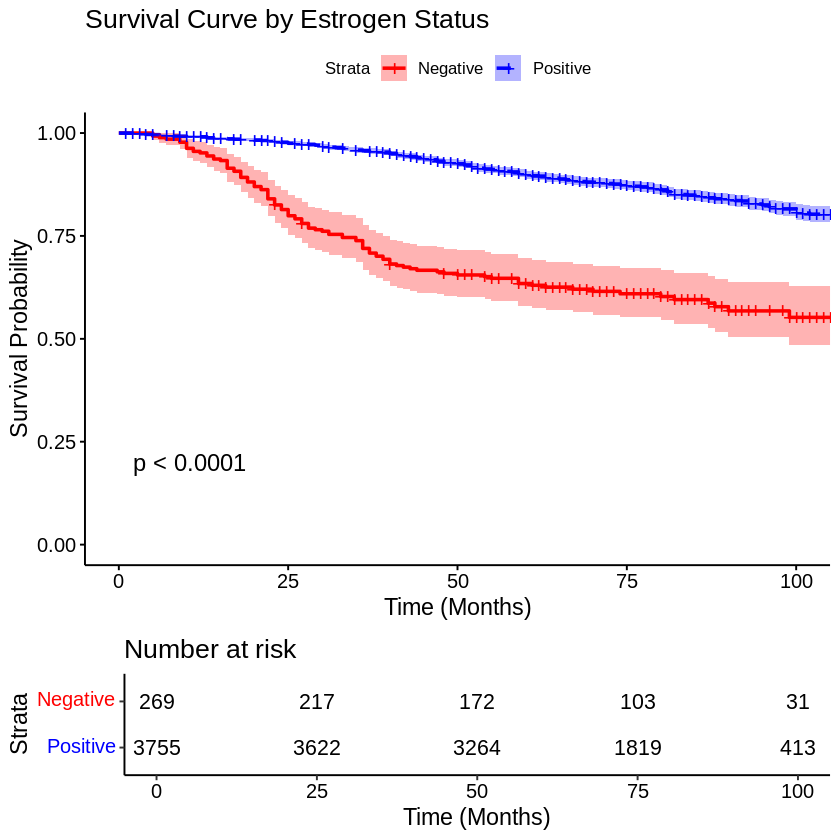

In [26]:
library(survival)
library(survminer)

# Create survival object
surv_object <- Surv(time = my_data$Survival.Months, event = my_data$Status == "Dead")

# Fit Kaplan-Meier curve, stratified by Estrogen.Status
fit <- survfit(surv_object ~ Estrogen.Status, data = my_data)

# Plot the survival curve with customizations
ggsurvplot(fit, conf.int = TRUE, risk.table = TRUE, pval = TRUE,
            title = "Survival Curve by Estrogen Status",
            xlab = "Time (Months)",
            ylab = "Survival Probability",
            palette = c("red", "blue"),
            linetype = c("solid", "dashed"),
            legend.labs = c("Negative", "Positive"))

### Key Observations

1. **Survival Probability Over Time**:

   Patients with Positive Estrogen Status (blue curve) show a consistently higher survival probability over time compared to those with Negative Estrogen Status (red curve).

   The survival curves clearly diverge early on and continue to show significant differences as time progresses.

2. **Significance (p-value)**:

   The p-value (p < 0.0001) indicates a statistically significant difference in survival between the two groups. This suggests that Estrogen Status has a strong association with patient survival outcomes.

3. **Confidence Intervals**:

   The shaded regions around the curves represent the confidence intervals. Both curves have relatively narrow intervals, suggesting a high degree of certainty in the estimated survival probabilities.

4. **Number at Risk**:

   The table below the graph shows the number of patients at risk at different time points:

   - **Negative Estrogen Status**: The sample size decreases significantly over time, with only 31 patients remaining at risk at the 100-month mark.
   - **Positive Estrogen Status**: This group starts with a much larger population (3,755 patients) and retains a notable number (413 patients) at 100 months.

5. **Clinical Implications**:

   Patients with Positive Estrogen Status have a clear survival advantage over those with Negative Estrogen Status.

   This might suggest that estrogen positivity (likely related to hormone receptor expression in a medical context like cancer) could be a favorable prognostic factor.


### Compare Survival Across Multiple Groups

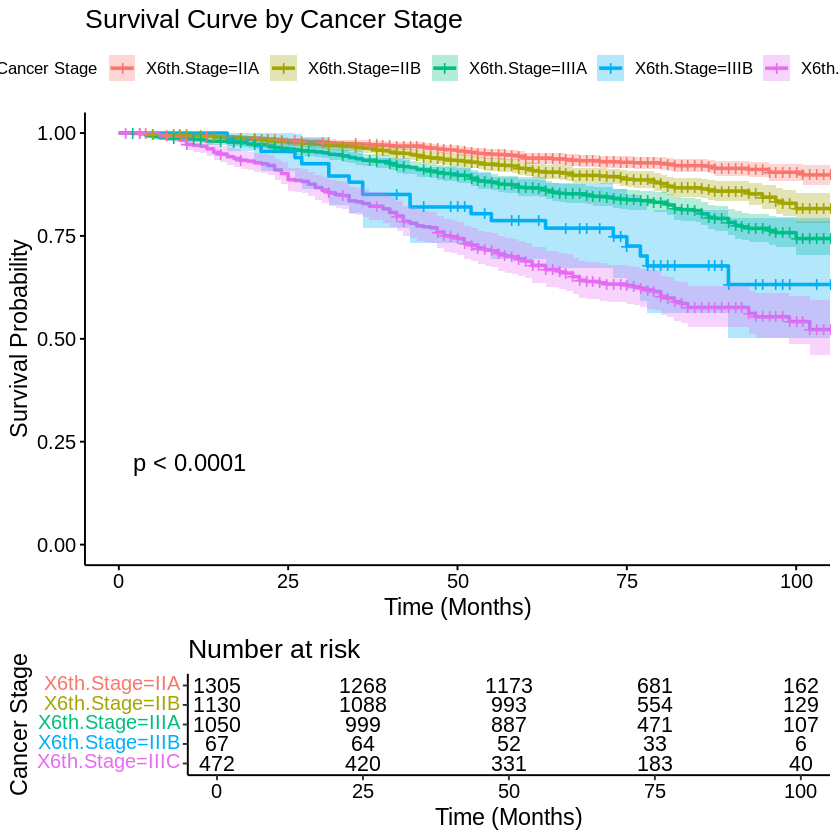

In [31]:
fit_stage <- survfit(surv_object ~ X6th.Stage, data = my_data)

ggsurvplot(fit_stage, conf.int = TRUE, risk.table = TRUE, pval = TRUE,
           title = "Survival Curve by Cancer Stage",
           xlab = "Time (Months)", ylab = "Survival Probability",
           legend.title = "Cancer Stage")

### Key Observations

1. **Survival Probability by Stage**:

   As expected, survival probability decreases with increasing cancer stage:

   - **Stage IIA and IIB (Green, Yellow)**: These early-stage cancers exhibit the highest survival probabilities over time.
   - **Stage IIIA and IIIB (Blue, Light Blue)**: These intermediate stages show lower survival probabilities, with a noticeable drop compared to stages IIA and IIB.
   - **Stage IIIC (Purple)**: This advanced stage has the worst survival outcomes, with a steep decline in survival probability over time.

2. **Statistical Significance**:

   The p-value (p < 0.0001) indicates a statistically significant difference in survival among the cancer stages. Cancer stage is a critical factor influencing patient survival.

3. **Confidence Intervals**:

   The shaded regions around each curve show the confidence intervals. Advanced stages (e.g., IIIC) have wider intervals, likely due to smaller sample sizes, as seen in the "Number at Risk" table.

4. **Number at Risk**:

   - **Early stages (IIA and IIB)**: Start with a larger number of patients, indicating that these stages are more commonly diagnosed.
   - **Advanced stages (IIIB and IIIC)**: Have fewer patients initially and a rapid decline over time, reflecting higher mortality.

5. **Survival Discrepancy**:

   A clear gradient of survival probability is observed, reinforcing the importance of early detection and intervention.

### Clinical Implications

- **Early Detection**: Patients diagnosed at earlier stages (IIA and IIB) have significantly better survival outcomes. This underscores the need for effective screening programs.
- **Tailored Treatment**: Patients in advanced stages may benefit from more aggressive or novel therapeutic approaches to improve survival.


In [35]:
# Define the survival object
surv_object <- Surv(time = my_data$Survival.Months, event = my_data$Status == "Dead")

# Fit the Cox proportional hazards model
cox_model <- coxph(surv_object ~ Age + Tumor.Size + Estrogen.Status + Tstage + Nstage, data = my_data)

# Display the summary
summary(cox_model)

Call:
coxph(formula = surv_object ~ Age + Tumor.Size + Estrogen.Status + 
    Tstage + Nstage, data = my_data)

  n= 4024, number of events= 616 

                             coef exp(coef)  se(coef)       z Pr(>|z|)    
Age                      0.020873  1.021092  0.004681   4.459 8.23e-06 ***
Tumor.Size               0.003775  1.003782  0.003103   1.216 0.223847    
Estrogen.StatusPositive -1.193938  0.303026  0.107343 -11.123  < 2e-16 ***
TstageT2                 0.332752  1.394802  0.113257   2.938 0.003303 ** 
TstageT3                 0.338419  1.402729  0.218609   1.548 0.121608    
TstageT4                 0.823560  2.278598  0.231598   3.556 0.000377 ***
NstageN2                 0.626360  1.870788  0.101309   6.183 6.30e-10 ***
NstageN3                 1.266086  3.546942  0.101506  12.473  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                        exp(coef) exp(-coef) lower .95 upper .95
Age                         1.021     0.9793 

### Key Observations from Summary

#### Significant Predictors:

- **Age**: Hazard Ratio (HR) = 1.021 (p < 0.001)
  - Each additional year increases the hazard (risk of death) by ~2.1%.

- **Estrogen.Status (Positive)**: HR = 0.303 (p < 0.001)
  - Estrogen-positive patients have a 70% lower risk of death compared to estrogen-negative patients.

- **Tstage T4**: HR = 2.28 (p < 0.001)
  - Patients with T4 stage tumors have more than twice the hazard compared to T1.

- **Nstage N3**: HR = 3.55 (p < 0.001)
  - Patients with N3 lymph node involvement have ~3.5 times the hazard compared to N0.

#### Non-Significant Predictors:

- **Tumor.Size** and **Tstage T3** do not show statistical significance (p > 0.05). Consider removing them in a refined model.

#### Model Fit:

- **Concordance Index (C-statistic)**: 0.713
  - Indicates the model has a good ability to discriminate between patients who survive longer and those who do not.

- All global tests (Likelihood Ratio, Wald, and Score) are significant (p < 0.001), indicating the model is statistically sound.


### Simplify the Model

In [38]:
# Simplify the model
refined_cox_model <- coxph(surv_object ~ Age + Estrogen.Status + Tstage + Nstage, data = my_data)

# Display the summary
summary(refined_cox_model)

Call:
coxph(formula = surv_object ~ Age + Estrogen.Status + Tstage + 
    Nstage, data = my_data)

  n= 4024, number of events= 616 

                             coef exp(coef)  se(coef)       z Pr(>|z|)    
Age                      0.020713  1.020929  0.004681   4.425 9.66e-06 ***
Estrogen.StatusPositive -1.191269  0.303835  0.107292 -11.103  < 2e-16 ***
TstageT2                 0.395634  1.485326  0.100608   3.932 8.41e-05 ***
TstageT3                 0.551936  1.736612  0.127460   4.330 1.49e-05 ***
TstageT4                 0.991597  2.695536  0.181752   5.456 4.88e-08 ***
NstageN2                 0.636611  1.890065  0.100851   6.312 2.75e-10 ***
NstageN3                 1.277872  3.588995  0.100974  12.655  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

                        exp(coef) exp(-coef) lower .95 upper .95
Age                        1.0209     0.9795    1.0116    1.0303
Estrogen.StatusPositive    0.3038     3.2913    0.2462    0.3749
Tst

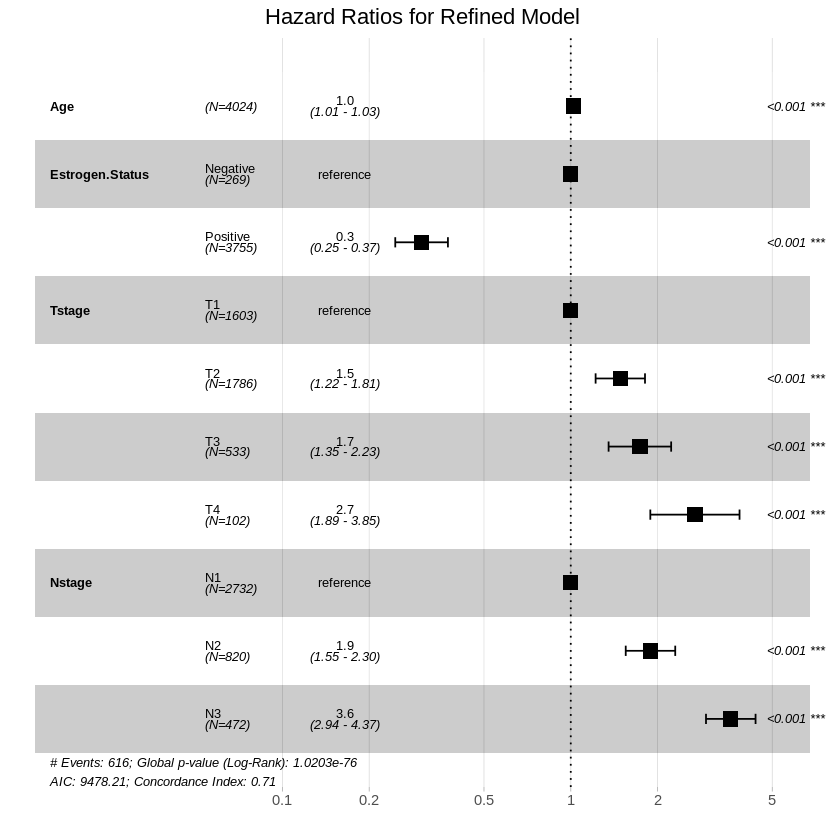

In [39]:
ggforest(refined_cox_model, data = my_data, main = "Hazard Ratios for Refined Model")

### Key Observations from the Forest Plot

1. **Age**:
   - Hazard Ratio (HR): 1.0 (Confidence Interval: 1.01–1.03).
   - Indicates that for each additional year of age, there is a slight but significant increase in the risk of death.
   - Significance: p < 0.001 (highly significant).

2. **Estrogen Status**:
   - HR for Positive Status: 0.3 (CI: 0.25–0.37), relative to the reference group (Negative).
   - Positive estrogen status is protective, reducing the risk of death by 70%.
   - Significance: p < 0.001 (highly significant).

3. **Tstage (Tumor Stage)**:
   - T2: HR = 1.5 (CI: 1.22–1.81).
   - T3: HR = 1.7 (CI: 1.35–2.23).
   - T4: HR = 2.7 (CI: 1.89–3.85).
   - As tumor stage progresses, the hazard ratio increases significantly, indicating worse survival outcomes.
   - Significance: All comparisons are p < 0.001 (highly significant).

4. **Nstage (Nodal Stage)**:
   - N2: HR = 1.9 (CI: 1.55–2.30).
   - N3: HR = 3.6 (CI: 2.94–4.37).
   - Higher nodal stage corresponds to a substantially increased risk of death.
   - Significance: All comparisons are p < 0.001 (highly significant).

5. **Model Fit Metrics**:
   - Number of Events: 616.
   - Global p-value (Log-Rank Test): 1.02e-76 (highly significant).
   - AIC: 9478.21 (lower values indicate better model fit).
   - Concordance Index (C-index): 0.71, indicating good predictive performance.

---

### Clinical Implications

1. **Age**: Although age slightly increases risk, its impact is modest compared to other variables.

2. **Estrogen Status**: Positive estrogen status significantly improves survival outcomes, emphasizing its role in treatment decisions.

3. **Tstage and Nstage**: Tumor and nodal stages are critical predictors of survival. Advanced stages (T3, T4; N2, N3) are associated with significantly worse outcomes, highlighting the need for aggressive intervention.


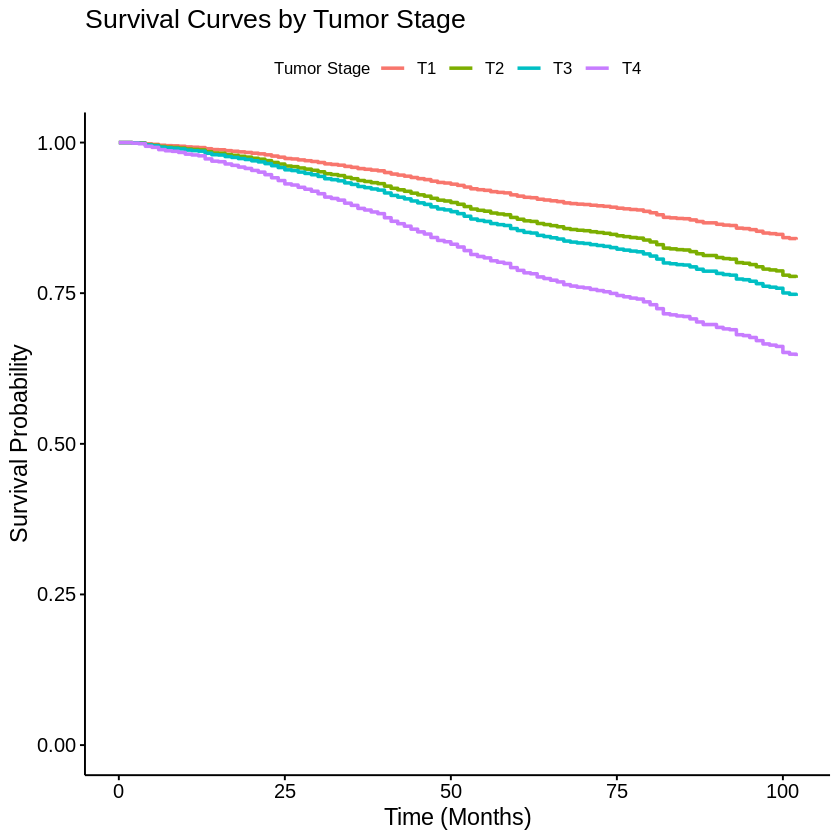

In [40]:
# Survival curves for Tstage
ggadjustedcurves(refined_cox_model, variable = "Tstage", data = my_data,
                 legend.title = "Tumor Stage",
                 title = "Survival Curves by Tumor Stage",
                 xlab = "Time (Months)", ylab = "Survival Probability")

### Key Observations

1. **Survival Probability**:
   - **T1 (red line)** shows the highest survival probability throughout the time period.
   - **T4 (purple line)** has the lowest survival probability, indicating the worst outcomes.
   - **T2 (green line)** and **T3 (blue line)** have intermediate survival probabilities, reflecting a gradual decline as tumor stage increases.

2. **Separation of Curves**:
   - The survival curves are well-separated, indicating a clear impact of tumor stage on survival probability.
   - Patients with lower tumor stages (T1) consistently outperform those with advanced stages (T3, T4) over time.

3. **Decline Over Time**:
   - Survival decreases more rapidly for advanced stages (T3, T4) compared to early stages (T1, T2).
   - This highlights the aggressive nature of advanced tumors.

4. **Time Horizon**:
   - The x-axis spans over 100 months, showing long-term follow-up.
   - Survival probabilities for T3 and T4 approach near zero in later months.

---

### Clinical Implications

1. **Treatment Focus**:
   - Early-stage tumors (T1, T2) have significantly better survival, emphasizing the importance of early detection and treatment.

2. **Prognostic Indicator**:
   - Tumor stage is a strong prognostic factor, with later stages being associated with poorer outcomes.

3. **Intervention Design**:
   - Tailored interventions could improve survival in advanced stages.


## work in progress